# Matplotlib és a Legkissebb négyzetek módszere

<img src="img/matplotlib_logo.png"/>

Ahogy a szoftvereszközök bemutatásánál már volt róla szó az adatok vizualizálása nagyon fontos, hisz egy-egy ábráról könyebb adatokat leolvasni, mint nagy táblázatokból vagy egyéb adastruktúrákból. Pythonban a `matplotlib` felel ezeknek az ábráknak a létrehozásához. Nézzük is meg hogyan is kell.

Először vegyünk egy egyszerű példát például bizonyos x értékekhez rendeljünk hozzá f(x)=y értékeket.

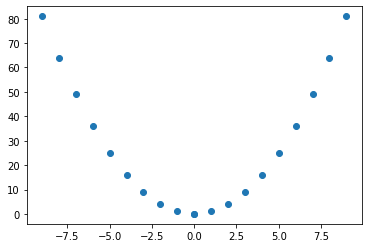

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x=np.zeros(20)
y=np.zeros(20)

for i in range(-9,10):
    x[i]=i
    y[i]=pow(x[i],2)
    
plot=plt.plot(x,y,"o")


Látható tehát a matplotlib plot hívásásval tudjuk kirajzopltatni az ábráinkat, melynek az első paramátere a értelmezési tartomány, a második az értékkészlet, és további paramáterként meglehet neki adni a jelölés formáját illetve feliratokat a label paraméter segítségével. Az értékeket megadhatjuk függvény segítségével is :

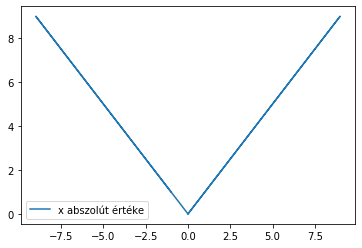

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x=np.zeros(20)
y=np.zeros(20)

for i in range(-9,10):
    x[i]=i
    
plot=plt.plot(x,abs(x),"-", label='x abszolút értéke', markersize=10)
plot = plt.legend()

plt.show(plot)



Megváltoztathatjuk a színét is az adott ábránknak illete több függvényt is ábrázolhatunk egyszerre.

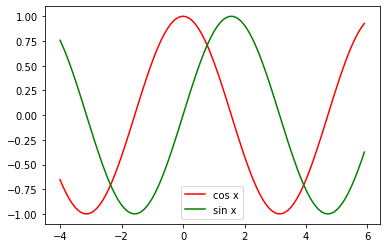

In [6]:
x=np.zeros(100)
d=-4
i=0

while i<100:
    x[i]=d;
    d=d+0.1
    i=i+1

plot=plt.plot(x,np.cos(x),"-r", label='cos x')
plot=plt.plot(x,np.sin(x),"-g", label='sin x')
plot = plt.legend()

plt.show(plot)

A tengelyeket is elnevezhetjük könnyedén a matplotlib ylabel és xlabel metódusaival és adhatunk címet is az ábránknak a title metódussal:

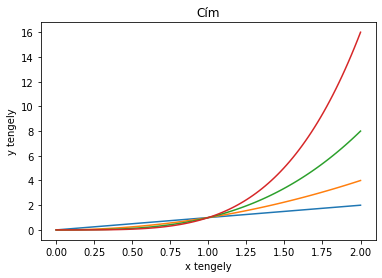

In [7]:
x = np.linspace(0, 2, 100)

plot=plt.plot(x,x)
plot=plt.plot(x,x**2)
plot=plt.plot(x,x**3)
plot=plt.plot(x,x**4)
plt.ylabel('y tengely')
plt.xlabel('x tengely')   
plt.title('Cím')

plt.show(plot)

Az előző példában használtam a `**` operátort ami egy egyszerű módja hogy valamit valamelyik hatványra emeljünk.

A matlotlib segítségével létrehozhatunk hisztogrammokat is  

(0, 6)

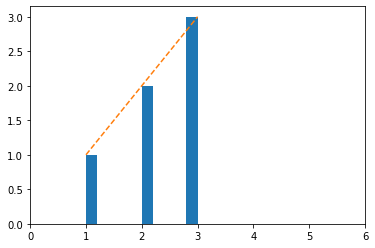

In [8]:
x=np.array([1,2,2,3,3,3])
plot=plt.hist(x)
plot=plt.plot(x,x, '--')
plt.xlim(0,6)



Adatainkat egy ploton belül töbféleképpen is megjeleníthetjük

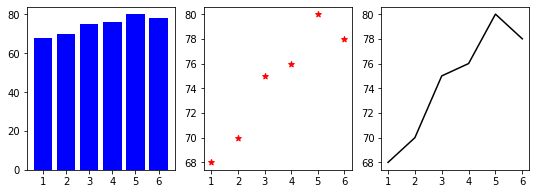

In [9]:
test = ['1', '2', '3', '4', '5', '6']
points = [68, 70, 75, 76, 80, 78]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(test, points, color='b')
plt.subplot(132)
plt.scatter(test, points, marker='*', color='r')
plt.subplot(133)
plt.plot(test, points, color='black')

plt.show()

Ilyen esetben a a jelőlő pontokat a marker, míg a színt a color paraméterrel tudjuk megváltoztatni

## Legkissebb négyzetek módszere

És most, nézzünk meg egy példát a legkissebb négyzetek módszerén, hogy való használatban is lássuk a matplotlib előnyét.

Feladatunk az, hogy kapott mérési eredményekre ráillesszünk egy egyenest. Adottak az értékek ez egy $y \in R^n$ és a hozzájuk tartozó helyek $x\in R^n $, és ezek alapján keressük a $y= a_0+a_1x$ egyenest melyre a $\sum_{i=0}^N[y_i-(a_0+a_1x_i)]^2 $ minimális. Szerencsénkre erre is tartalmaz beépített metódust a `NumPy`. A ` linalg` csomagban található `lstsq` metódus megadja az egyenest amire szükségünk van.

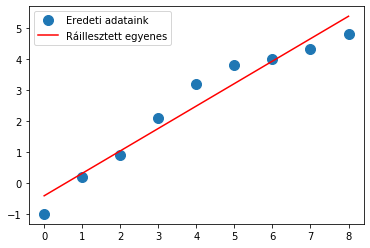

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])

y = np.array([-1, 0.2, 0.9, 2.1, 3.2, 3.8, 4.0, 4.3, 4.8])

a=np.vstack([x, np.ones(len(x))]).T

m, c = np.linalg.lstsq(a, y, rcond=None)[0]

plot = plt.plot(x, y, 'o', label='Eredeti adataink', markersize=10)
plot = plt.plot(x, m*x + c, 'r', label='Ráillesztett egyenes')
plot = plt.legend()

plt.show(plot)




## 3D plotting

A Matplotlib megengedi számunkra az is, hogy 3 dimenziós ábrákat készítsünk el. Ezek lehetnek felületek 3D-s térben elszórt pontok esetleg függvények is. Ehhez szügségünk van a __mplot3d__ csomagra ami az __mpl_toolkits__ része. 

elsőnek nézzünk meg egy 3 dimensziós ívet:

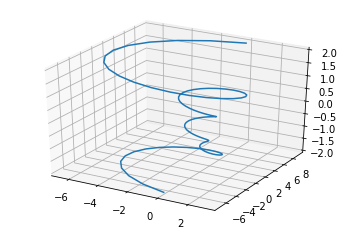

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**3 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z)
plt.show()

Az ábbrán látható hogy a pontok által leírt ívet jeleníti meg egyetlen vonalként a matplotlib de akár elhelyezhetjük rá az adott diszkrét pontokat is.

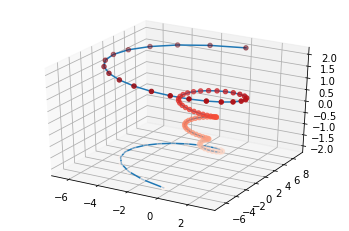

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
zline = np.linspace(-2, 2, 100)
r = z**3 + 1
xline = r * np.sin(theta)
yline = r * np.cos(theta)
ax.plot(xline, yline, zline)

zpoints = np.linspace(-2, 2, 100)
xpoints = r * np.sin(theta)
ypoints = r * np.cos(theta)
ax.scatter3D(xpoints, ypoints, zpoints, c=z, cmap="Reds")
plt.show()

Megtehetjük azt is hogy cak a pontokat helyezzük el a 3D-s térben.

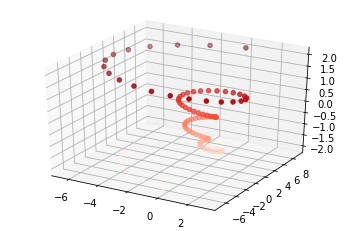

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
r = z**3 + 1
zpoints = np.linspace(-2, 2, 100)
xpoints = r * np.sin(theta)
ypoints = r * np.cos(theta)
ax.scatter3D(xpoints, ypoints, zpoints, c=z, cmap="Reds")
plt.show()

Egy felületet megjeleníthetünk többféleképpen is a __wireframe__ segítségével egy háló szerűen, míg a __surface__ használatával egybefüggő felületként. Figyelni kell míg az előzőekben a 

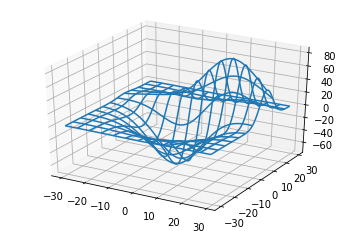

In [37]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.1)

ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)

plt.show()



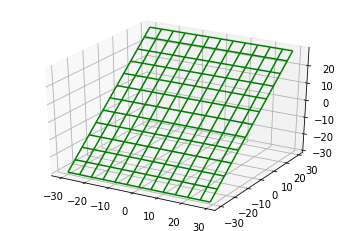

In [52]:
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')


X, Y, Z = axes3d.get_test_data(0.1)

ax.plot_wireframe(X, Y, Y, rstride=5, cstride=5 ,color="Green")

plt.show()

És akkor nézzük a surface-t

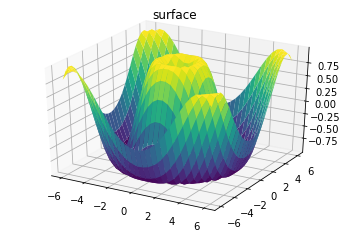

In [45]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

3D plottingnál csak kirajzolja a matplotliba az ábrákat nem interaktív, nem tudjuk forgatni, de beállíthatjuk a szöget amelyből nézni szeretnénk az ábrát.

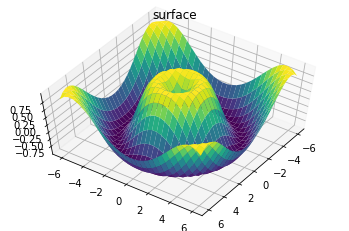

In [55]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');
ax.view_init(60, 35)

Sok más lehetőséget is kínál a matplotlib példáúl megjeleníthetünk 3d-ben 2-ds adatokat vagy csinálhatunk 3d-s hisztogrammot több adattal, de a fent említettek talán a legfontosabbak és legtöbbet használtak. 